In [1]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/Madison/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages (0.0)


In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.read_csv('base_inventory_files/city_mean_pending_weekly_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_mean_pending_weekly_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_median_pending_weekly_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_median_pending_weekly_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_new_pending_weekly_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_new_pending_weekly_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_inventory_weekly_allHomes_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_inventory_weekly_allHomes_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_inventory_weekly_SFH_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_inventory_weekly_SFH_smooth.csv', header=False, index=False)

In [4]:
mean_pending = pd.read_csv("transposed_inventory_files/city_mean_pending_weekly_smooth.csv")
median_pending = pd.read_csv("transposed_inventory_files/city_median_pending_weekly_smooth.csv")
new_pending = pd.read_csv("transposed_inventory_files/city_new_pending_weekly_smooth.csv")
inventory_all = pd.read_csv("transposed_inventory_files/city_inventory_weekly_allHomes_smooth.csv")
inventory_SFH = pd.read_csv("transposed_inventory_files/city_inventory_weekly_SFH_smooth.csv")

In [5]:
mean_pending.columns = mean_pending.iloc[1]
mean_pending = mean_pending.drop([0,1,2,3])
mean_pending = mean_pending.rename(columns={"RegionName": "Date"})
mean_pending = mean_pending.reset_index(drop=True)
mean_pending.insert(1, 'Total_Days', "")
x = 0
for index, row in mean_pending.iterrows():
    mean_pending["Total_Days"][index] = x
    x = x + 7
mean_pending

1,Date,Total_Days,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
0,2018-01-06,0,78.0,103.0,50.0,89.0,64.0,86.0,75.0,71.0,...,85.0,53.0,43.0,58.0,67.0,96.0,NaN,79.0,59.0,61.0
1,2018-01-13,7,79.0,106.0,52.0,89.0,64.0,89.0,75.0,74.0,...,82.0,61.0,48.0,65.0,68.0,90.0,NaN,84.0,56.0,69.0
2,2018-01-20,14,79.0,106.0,52.0,87.0,64.0,92.0,77.0,74.0,...,78.0,60.0,50.0,58.0,66.0,93.0,NaN,82.0,50.0,70.0
3,2018-01-27,21,78.0,107.0,50.0,87.0,64.0,91.0,76.0,72.0,...,83.0,70.0,53.0,65.0,71.0,97.0,NaN,83.0,47.0,74.0
4,2018-02-03,28,75.0,104.0,46.0,83.0,62.0,87.0,73.0,73.0,...,77.0,70.0,49.0,73.0,68.0,91.0,NaN,80.0,42.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-29,1239,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,...,NaN,10.0,NaN,19.0,10.0,NaN,14.0,11.0,NaN,41.0
178,2021-06-05,1246,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,...,NaN,9.0,NaN,18.0,11.0,NaN,13.0,11.0,NaN,32.0
179,2021-06-12,1253,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,...,NaN,9.0,NaN,18.0,12.0,NaN,13.0,11.0,NaN,32.0
180,2021-06-19,1260,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,...,NaN,10.0,NaN,19.0,12.0,NaN,12.0,12.0,NaN,28.0


In [6]:
median_pending.columns = median_pending.iloc[1]
median_pending = median_pending.drop([0,1,2,3])
median_pending = median_pending.rename(columns={"RegionName": "Date"})
median_pending = median_pending.reset_index(drop=True)
median_pending

1,Date,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
0,2018-01-06,42.0,66.0,25.0,55.0,37.0,53.0,37.0,47.0,44.0,...,63.0,24.0,32.0,32.0,38.0,51.0,NaN,48.0,33.0,36.0
1,2018-01-13,43.0,68.0,27.0,56.0,38.0,58.0,38.0,49.0,43.0,...,58.0,29.0,35.0,36.0,38.0,49.0,NaN,56.0,34.0,42.0
2,2018-01-20,43.0,69.0,26.0,55.0,38.0,61.0,38.0,51.0,43.0,...,55.0,25.0,34.0,38.0,41.0,46.0,NaN,53.0,29.0,33.0
3,2018-01-27,41.0,72.0,23.0,52.0,37.0,61.0,38.0,47.0,44.0,...,56.0,28.0,29.0,41.0,39.0,50.0,NaN,51.0,30.0,36.0
4,2018-02-03,36.0,70.0,18.0,43.0,33.0,57.0,34.0,45.0,44.0,...,46.0,33.0,20.0,54.0,33.0,48.0,NaN,46.0,26.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-29,NaN,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,...,NaN,5.0,NaN,6.0,4.0,NaN,4.0,5.0,NaN,14.0
178,2021-06-05,NaN,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,...,NaN,5.0,NaN,6.0,5.0,NaN,4.0,5.0,NaN,7.0
179,2021-06-12,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,...,NaN,5.0,NaN,6.0,5.0,NaN,4.0,5.0,NaN,7.0
180,2021-06-19,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,...,NaN,5.0,NaN,6.0,5.0,NaN,4.0,5.0,NaN,7.0


In [7]:
new_pending.columns = new_pending.iloc[1]
new_pending = new_pending.drop([0,1,2,3])
new_pending = new_pending.rename(columns={"RegionName": "Date"})
new_pending = new_pending.reset_index(drop=True)
new_pending

1,Date,"Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Houston, TX","Miami-Fort Lauderdale, FL","Atlanta, GA","Boston, MA","Riverside, CA","Phoenix, AZ",...,"Dayton, OH","Greensboro, NC","Akron, OH","Stockton, CA","Charleston, SC","Colorado Springs, CO","Springfield, MA","Toledo, OH","Harrisburg, PA","Fort Collins, CO"
0,2018-01-06,2045.0,2266.0,1489.0,1373.0,1358.0,1950.0,998.0,868.0,NaN,...,84.0,NaN,118.0,174.0,232.0,175.0,74.0,116.0,175.0,NaN
1,2018-01-13,2081.0,2338.0,1444.0,1430.0,1440.0,2071.0,980.0,883.0,NaN,...,100.0,NaN,123.0,183.0,240.0,196.0,78.0,122.0,172.0,NaN
2,2018-01-20,2041.0,2521.0,1388.0,1464.0,1492.0,2207.0,996.0,900.0,NaN,...,105.0,NaN,128.0,178.0,264.0,202.0,76.0,125.0,155.0,NaN
3,2018-01-27,2440.0,2928.0,1528.0,1708.0,1723.0,2541.0,1212.0,1055.0,NaN,...,119.0,NaN,139.0,198.0,318.0,221.0,85.0,141.0,189.0,NaN
4,2018-02-03,2904.0,3392.0,1725.0,1941.0,1919.0,2859.0,1426.0,1191.0,NaN,...,133.0,NaN,148.0,214.0,376.0,231.0,101.0,156.0,222.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-29,NaN,NaN,2299.0,2459.0,NaN,NaN,NaN,1255.0,1510.0,...,268.0,71.0,241.0,NaN,NaN,NaN,NaN,190.0,NaN,71.0
178,2021-06-05,NaN,NaN,2238.0,2403.0,NaN,NaN,NaN,1232.0,1457.0,...,251.0,69.0,241.0,NaN,NaN,NaN,NaN,186.0,NaN,68.0
179,2021-06-12,NaN,NaN,2213.0,2435.0,NaN,NaN,NaN,1274.0,1449.0,...,258.0,69.0,245.0,NaN,NaN,NaN,NaN,188.0,NaN,69.0
180,2021-06-19,NaN,NaN,2215.0,2429.0,NaN,NaN,NaN,1275.0,1447.0,...,269.0,63.0,245.0,NaN,NaN,NaN,NaN,191.0,NaN,67.0


In [8]:
inventory_all.columns = inventory_all.iloc[1]
inventory_all = inventory_all.drop([0,1,2,3])
inventory_all = inventory_all.rename(columns={"RegionName": "Date"})
inventory_all = inventory_all.reset_index(drop=True)
inventory_all

1,Date,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
0,2017-11-04,1297949.0,67386.0,19426.0,41171.0,26927.0,24981.0,30777.0,19866.0,41883.0,...,2725.0,3086.0,1509.0,4621.0,3570.0,2460.0,3398.0,2588.0,1378.0,3065.0
1,2017-11-11,1287338.0,66589.0,19041.0,40442.0,26575.0,25310.0,30554.0,20371.0,42186.0,...,2658.0,3053.0,1486.0,4660.0,3524.0,2448.0,3380.0,2634.0,1357.0,2978.0
2,2017-11-18,1274429.0,65633.0,18645.0,39565.0,26275.0,25324.0,30247.0,20936.0,42477.0,...,2573.0,3035.0,1470.0,4694.0,3475.0,2429.0,3341.0,2587.0,1335.0,2877.0
3,2017-11-25,1256270.0,64374.0,18129.0,38407.0,25756.0,25117.0,29860.0,21635.0,42615.0,...,2477.0,3017.0,1443.0,4731.0,3409.0,2410.0,3289.0,2577.0,1305.0,2756.0
4,2017-12-02,1237609.0,63183.0,17652.0,37275.0,25160.0,24612.0,29514.0,22260.0,42823.0,...,2380.0,3011.0,1417.0,4752.0,3358.0,2386.0,3238.0,2538.0,1278.0,2638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2021-05-29,613881.0,46757.0,12042.0,23847.0,14123.0,11379.0,16786.0,10735.0,25401.0,...,1760.0,1339.0,778.0,2371.0,2021.0,829.0,1224.0,770.0,926.0,1579.0
187,2021-06-05,618410.0,47233.0,12041.0,24215.0,14136.0,11528.0,16784.0,10893.0,25129.0,...,1786.0,1329.0,784.0,2370.0,1983.0,826.0,1226.0,791.0,936.0,1564.0
188,2021-06-12,629611.0,47992.0,12166.0,24765.0,14277.0,11787.0,16988.0,11175.0,25080.0,...,1827.0,1360.0,799.0,2388.0,1982.0,844.0,1239.0,822.0,967.0,1575.0
189,2021-06-19,638470.0,48478.0,12271.0,25145.0,14364.0,11932.0,17164.0,11319.0,24761.0,...,1845.0,1355.0,815.0,2411.0,2002.0,858.0,1258.0,849.0,999.0,1589.0


In [9]:
inventory_SFH.columns = inventory_SFH.iloc[1]
inventory_SFH = inventory_SFH.drop([0,1,2,3])
inventory_SFH = inventory_SFH.rename(columns={"RegionName": "Date"})
inventory_SFH = inventory_SFH.reset_index(drop=True)
inventory_SFH

1,Date,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
0,2017-11-04,1161023.0,51047.0,16248.0,34671.0,26097.0,23771.0,29564.0,18232.0,18940.0,...,2322.0,3109.0,1474.0,3522.0,3057.0,2430.0,3473.0,2444.0,1419.0,2741.0
1,2017-11-11,1150663.0,50385.0,15920.0,34026.0,25741.0,24069.0,29341.0,18705.0,19053.0,...,2263.0,3073.0,1450.0,3549.0,3010.0,2417.0,3453.0,2491.0,1394.0,2651.0
2,2017-11-18,1138247.0,49595.0,15602.0,33275.0,25438.0,24098.0,29047.0,19221.0,19149.0,...,2183.0,3052.0,1433.0,3571.0,2956.0,2398.0,3412.0,2452.0,1368.0,2547.0
3,2017-11-25,1121166.0,48581.0,15189.0,32292.0,24918.0,23911.0,28669.0,19865.0,19156.0,...,2092.0,3031.0,1406.0,3602.0,2892.0,2380.0,3359.0,2449.0,1337.0,2425.0
4,2017-12-02,1103702.0,47601.0,14798.0,31305.0,24319.0,23470.0,28334.0,20452.0,19195.0,...,2000.0,3025.0,1380.0,3622.0,2840.0,2356.0,3306.0,2417.0,1309.0,2318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2021-05-29,524230.0,27931.0,10007.0,20527.0,13082.0,10910.0,15413.0,10151.0,9625.0,...,1440.0,1285.0,755.0,1878.0,1690.0,817.0,1213.0,764.0,813.0,1271.0
187,2021-06-05,529399.0,28373.0,9998.0,20918.0,13103.0,11053.0,15437.0,10280.0,9673.0,...,1460.0,1276.0,759.0,1879.0,1667.0,812.0,1215.0,785.0,822.0,1252.0
188,2021-06-12,540328.0,28998.0,10116.0,21410.0,13246.0,11305.0,15653.0,10515.0,9792.0,...,1494.0,1310.0,770.0,1904.0,1680.0,829.0,1228.0,817.0,852.0,1251.0
189,2021-06-19,549460.0,29462.0,10214.0,21799.0,13335.0,11440.0,15850.0,10614.0,9837.0,...,1515.0,1309.0,785.0,1938.0,1714.0,842.0,1247.0,842.0,886.0,1252.0


In [10]:
mean_locations = ['United States', 'New York, NY',
       'Los Angeles-Long Beach-Anaheim, CA', 'Chicago, IL',
       'Dallas-Fort Worth, TX', 'Philadelphia, PA', 'Houston, TX',
       'Washington, DC', 'Miami-Fort Lauderdale, FL', 'Atlanta, GA',
       'Boston, MA', 'San Francisco, CA', 'Detroit, MI', 'Riverside, CA',
       'Phoenix, AZ', 'Seattle, WA', 'Minneapolis-St Paul, MN',
       'San Diego, CA', 'St. Louis, MO', 'Tampa, FL', 'Baltimore, MD',
       'Denver, CO', 'Pittsburgh, PA', 'Portland, OR', 'Charlotte, NC',
       'Sacramento, CA', 'San Antonio, TX', 'Orlando, FL', 'Cincinnati, OH',
       'Cleveland, OH', 'Kansas City, MO', 'Las Vegas, NV', 'Columbus, OH',
       'Indianapolis, IN', 'San Jose, CA', 'Austin, TX', 'Virginia Beach, VA',
       'Nashville, TN', 'Providence, RI', 'Milwaukee, WI', 'Jacksonville, FL',
       'Memphis, TN', 'Oklahoma City, OK', 'Louisville-Jefferson County, KY',
       'Hartford, CT', 'Richmond, VA', 'New Orleans, LA', 'Buffalo, NY',
       'Raleigh, NC', 'Birmingham, AL', 'Salt Lake City, UT', 'Rochester, NY',
       'Grand Rapids, MI', 'Tucson, AZ', 'Tulsa, OK', 'Fresno, CA',
       'Worcester, MA', 'Stamford, CT', 'Albuquerque, NM', 'Albany, NY',
       'Omaha, NE', 'New Haven, CT', 'Bakersfield, CA', 'Knoxville, TN',
       'Greenville, SC', 'Ventura, CA', 'Allentown, PA', 'El Paso, TX',
       'Baton Rouge, LA', 'Dayton, OH', 'McAllen, TX', 'Columbia, SC',
       'Greensboro, NC', 'Akron, OH', 'North Port-Sarasota-Bradenton, FL',
       'Little Rock, AR', 'Stockton, CA', 'Charleston, SC', 'Syracuse, NY',
       'Colorado Springs, CO', 'Winston-Salem, NC', 'Wichita, KS',
       'Springfield, MA', 'Fort Myers, FL', 'Boise City, ID', 'Toledo, OH',
       'Madison, WI', 'Lakeland, FL', 'Ogden, UT', 'Daytona Beach, FL',
       'Des Moines, IA', 'Jackson, MS', 'Augusta, GA', 'Harrisburg, PA',
       'Provo, UT', 'Fort Collins, CO']

In [47]:
mean_location_df = mean_pending.iloc[:, [1,2]]
mean_location_df = mean_location_df.rename(columns={f"{mean_locations[0]}": "Mean_Pending"})
mean_location_df[["Mean_Pending"]] = mean_location_df[["Mean_Pending"]].apply(pd.to_numeric)
mean_location_df.loc[:,'LastWeek'] = mean_location_df.loc[:,"Mean_Pending"].shift()
mean_location_df.loc[:,'LastWeek_Diff'] = mean_location_df.loc[:,'LastWeek'].diff()
mean_location_df = mean_location_df.dropna()
mean_location_df = mean_location_df.reset_index(drop=True)
mean_location_df

1,Total_Days,Mean_Pending,LastWeek,LastWeek_Diff
0,14,79.0,79.0,1.0
1,21,78.0,79.0,0.0
2,28,75.0,78.0,-1.0
3,35,73.0,75.0,-3.0
4,42,71.0,73.0,-2.0
...,...,...,...,...
150,1064,42.0,40.0,0.0
151,1071,43.0,42.0,2.0
152,1078,44.0,43.0,1.0
153,1085,45.0,44.0,1.0


In [48]:
X = mean_location_df[:].drop(['Mean_Pending'], axis = 1)
y = mean_location_df["Mean_Pending"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9903519864822314
Testing Data Score: 0.9899705269635991


In [51]:
r = len(mean_location_df.index)
r = r - 1
#running for 2 years of data
for i in range(0,25):
    LastWeekValue = mean_location_df["Mean_Pending"][r]
    TotalDaysValue = mean_location_df["Total_Days"][r] + 7
    DifferenceValue = mean_location_df["Mean_Pending"][r] - mean_location_df["LastWeek"][r]
    NewX = [[TotalDaysValue, LastWeekValue, DifferenceValue]]
    predicted_value = model.predict(NewX)
    predicted_number = str(predicted_value).lstrip('[').rstrip(']')
    predicted_pending = float(predicted_number)
    new_row = {'Total_Days': TotalDaysValue, 'Mean_Pending': predicted_pending, 'LastWeek': LastWeekValue, 'LastWeek_Diff': DifferenceValue}
    mean_location_df = mean_location_df.append(new_row, ignore_index = True)
    r = r + 1
    i = i + 1


In [52]:
mean_location_df

1,Total_Days,Mean_Pending,LastWeek,LastWeek_Diff
0,14,79.000000,79.000000,1.000000
1,21,78.000000,79.000000,0.000000
2,28,75.000000,78.000000,-1.000000
3,35,73.000000,75.000000,-3.000000
4,42,71.000000,73.000000,-2.000000
...,...,...,...,...
175,1239,57.834987,57.889262,-0.050835
176,1246,57.780140,57.834987,-0.054275
177,1253,57.726893,57.780140,-0.054847
178,1260,57.676824,57.726893,-0.053248


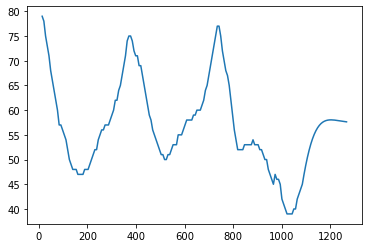

In [53]:
import matplotlib.pyplot as plt
plt.plot(mean_location_df["Total_Days"], mean_location_df["Mean_Pending"])